Index : 190557V
Name : Sandaruwan K.G.C.P
Assignment 2

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy . optimize import minimize
from scipy import linalg
import random

(1)

In [2]:
def setCircle(b, c, d):
  temp = c[0]**2 + c[1]**2
  bc = (b[0]**2 + b[1]**2 - temp) / 2
  cd = (temp - d[0]**2 - d[1]**2) / 2
  det = (b[0] - c[0]) * (c[1] - d[1]) - (c[0] - d[0]) * (b[1] - c[1])

  if abs(det) < 1.0e-10:
    return None
    
  cx = (bc*(c[1] - d[1]) - cd*(b[1] - c[1])) / det
  cy = ((b[0] - c[0]) * cd - (c[0] - d[0]) * bc) / det

  radius = ((cx - b[0])**2 + (cy - b[1])**2)**.5

  return cx,cy,radius

def minDistance(p,x,y,r):
    re= np.array(abs(((p[:,0]-x)**2+(p[:,1]-y)**2)**0.5-r))
    return re

def plotCircle(Data,Datalst,color='r'):
    x,y,r=setCircle(Datalst[Data[0]],Datalst[Data[1]],Datalst[Data[2]])
    c=plt.Circle((x,y),r,fill=False)
    c.set_color(color)
    return c


In [3]:
# np . random . seed ( 0 )
N = 100
half_n = N//2
r = 10
s = r /16
t = np . random . uniform (0 , 2*np . pi , half_n )
n = s*np . random . randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
m, b = -1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random . randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )

In [4]:
def RANSAC(Data,N,t,n):
    max_i=0
    output=np.array([])

    for i in range(N):
        randomPoints=np.random.choice(Data.size//2, size=3, replace=False)
        x,y,r=setCircle(Data[randomPoints[0]],Data[randomPoints[1]],Data[randomPoints[2]])
        PO=minDistance(Data,x,y,r)
        if r>max(Data[:,1])*1.5:
            continue
        inliers=Data[PO<t]
        if len(inliers)>n:
            me=minDistance(inliers,x,y,r)
            mean = sum(me/me.size)
            if max_i < len(inliers):
                best=mean
                output=randomPoints
                il=inliers
            elif max_i == len(inliers) and best>mean:
                best=mean
                output=randomPoints
                il=inliers
    return output,il

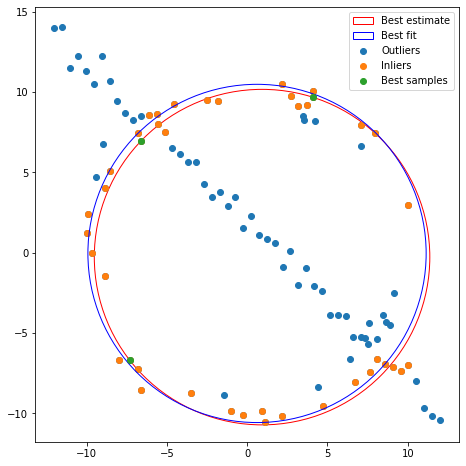

In [5]:
ranL,bestInlier=RANSAC(X,500,1,40)          
c=plotCircle(ranL,X)
fig,ax=plt.subplots(figsize=(8,8))
ax.set_aspect( 1 )
ax.add_artist( c )
p1=ax.scatter(X[:,0],X[:,1])
p2=ax.scatter(bestInlier[:,0],bestInlier[:,1])
bestfit,inl=RANSAC(bestInlier,50,1,bestInlier.size//2.2)
c2=plotCircle(bestfit,bestInlier,'b')
ax.add_artist( c2 )
Y=np.vstack((X[ranL[0]],X[ranL[1]],X[ranL[2]]))
p3=ax.scatter(Y[:,0],Y[:,1])
plt.legend(handles=[c, c2,p1,p2,p3],labels=['Best estimate','Best fit','Outliers','Inliers','Best samples'])
plt.show()

In [13]:
def overlay(im_src,im_dst,pts_src,pts_dst):
    h = cv.getPerspectiveTransform(pts_src, pts_dst)
    transformed=cv.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))
    b = (transformed[:,:,0]==0)*im_dst[:,:,0]
    g=(transformed[:,:,1]==0)*im_dst[:,:,1]
    r=(transformed[:,:,2]==0)*im_dst[:,:,2]
    maskedImage=np.dstack((b,g,r))
    overlayedImage=cv.add(maskedImage,transformed)
    return overlayedImage

# Importing Images
child = cv.imread(r'./child.jpg')
nature = cv.imread(r'./nature.jpg')
wall = cv.imread(r'./wall.webp')
assert child is not None
assert wall is not None
assert nature is not None

In [7]:
# Function for getting coordinates of points by mouse click
def mouseClick(event,x,y,flags,params):
    if event==cv.EVENT_LBUTTONDOWN:
        print(x,' ',y)
        

cv.imshow('image',wall)
cv.setMouseCallback('image',mouseClick)
cv.waitKey(0)
cv.destroyAllWindows()

(-0.5, 389.5, 279.5, -0.5)

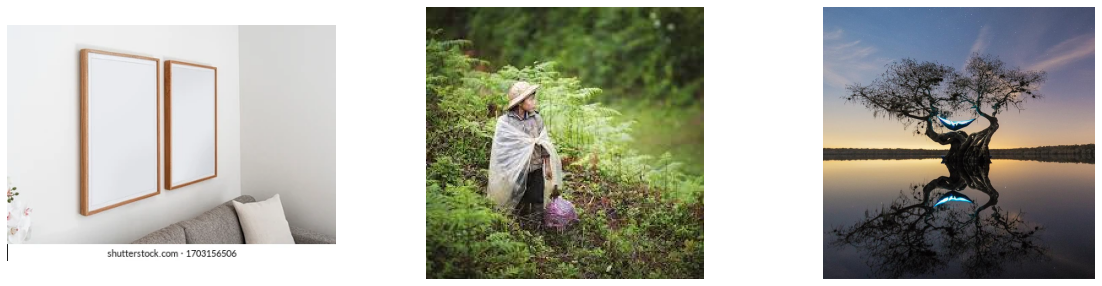

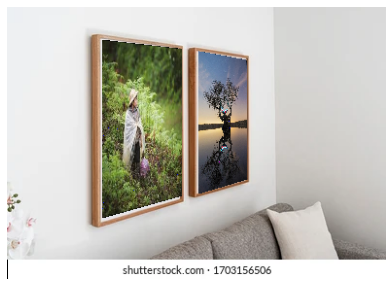

In [8]:
# Defining Points of edges to find homography
child_src = np.float32([[0, 0], [child.shape[0], 0], [child.shape[0], child.shape[1]], [0, child.shape[1]]])
child_dst = np.float32([[98,34],[178, 43],[178, 198],[98,221]])

nature_src = np.float32([[0, 0], [nature.shape[0], 0], [nature.shape[0], nature.shape[1]], [0, nature.shape[1]]])
nature_dst = np.float32([[197,45],[246,54],[247,177],[197,192]])

warped1 = overlay(child,wall,child_src,child_dst)
warped2 = overlay(nature,warped1,nature_src,nature_dst)
#cv.imshow("image",warped2)
#cv.waitKey(0)
#cv.destroyAllWindows()

fig,ax = plt.subplots(1,3,figsize=(20,5))
ax[0].imshow(cv.cvtColor(wall,cv.COLOR_BGR2RGB))
ax[0].axis("off")
ax[1].imshow(cv.cvtColor(child,cv.COLOR_BGR2RGB))
ax[1].axis("off")
ax[2].imshow(cv.cvtColor(nature,cv.COLOR_BGR2RGB))
ax[2].axis("off")

fig,ax = plt.subplots(figsize=(20,5))
ax.imshow(cv.cvtColor(warped2,cv.COLOR_BGR2RGB))
ax.axis("off")


(3) (a)

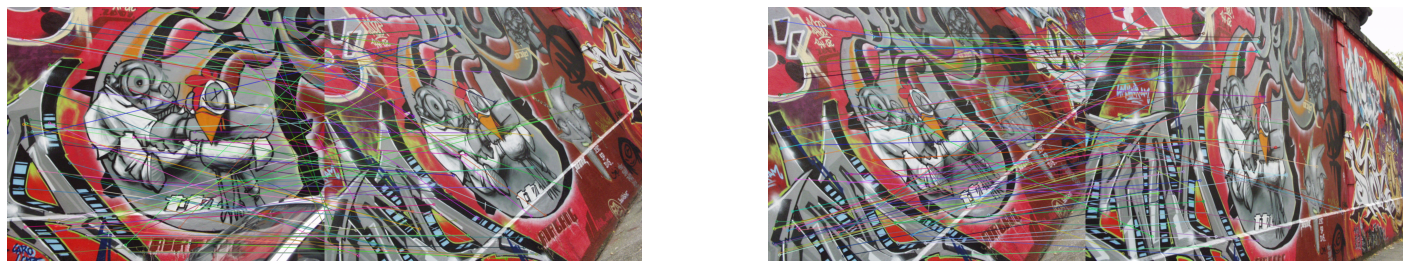

In [23]:
img1 = cv.imread(r"./graf/img1.ppm", cv.IMREAD_COLOR)
img2 = cv.imread(r"./graf/img4.ppm", cv.IMREAD_COLOR)
img3 = cv.imread(r"./graf/img5.ppm", cv.IMREAD_COLOR)

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

sift = cv.SIFT_create(nfeatures=0,nOctaveLayers=3,contrastThreshold=0.04,edgeThreshold=10,sigma=1.6)

kp1, descriptors1 = sift.detectAndCompute(img1, None) 
kp2, descriptors2 = sift.detectAndCompute(img2, None)
kp3, descriptors3 = sift.detectAndCompute(img3, None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck = True)

matches1 = bf.match(descriptors1, descriptors2)
matches2 = bf.match(descriptors2, descriptors3)
sortMatches1 = sorted(matches1, key = lambda x:x.distance)
sortMatches2 = sorted(matches2, key = lambda x:x.distance)

final1 = cv.drawMatches(img1, kp1, img2, kp2, sortMatches1[:100], img2, flags =2)
final2 = cv.drawMatches(img2, kp2, img3, kp3, sortMatches2[:100], img3, flags = 2)

fig, ax = plt.subplots(1,2, figsize = (25, 30))
ax[0].imshow(final1)
ax[0].axis('off')
ax[1].imshow(final2)
ax[1].axis('off')
plt.show()

(b)

In [17]:
def distance(correspondence, h):

    p1 = np.transpose(np.matrix([correspondence[0].item(0), correspondence[0].item(1), 1]))
    estimatep2 = np.dot(h, p1)
    estimatep2 = (1/estimatep2.item(2))*estimatep2
    p2 = np.transpose(np.matrix([correspondence[0].item(2), correspondence[0].item(3), 1]))
    return np.linalg.norm( p2 - estimatep2)

def homography(correspondences):
    list = []
    for correspondence in correspondences:
        p1 = np.matrix([correspondence.item(0), correspondence.item(1), 1])
        p2 = np.matrix([correspondence.item(2), correspondence.item(3), 1])

        a2 = [0, 0, 0, -p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2),
              p2.item(1) * p1.item(0), p2.item(1) * p1.item(1), p2.item(1) * p1.item(2)]
        a1 = [-p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2), 0, 0, 0,
              p2.item(0) * p1.item(0), p2.item(0) * p1.item(1), p2.item(0) * p1.item(2)]
        list.append(a1)
        list.append(a2)

    matrixA = np.matrix(list)
    u, s, v = np.linalg.svd(matrixA)
    h = np.reshape(v[8], (3, 3))
    h = (1/h.item(8)) * h
    return h


def RANSAC(corr, thresh):
    maxInliers = []
    finalH = None
    for i in range(1000):
        correspondence1 = corr[random.randrange(0, len(corr))]
        correspondence2 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((correspondence1, correspondence2))
        correspondence3 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((randomFour, correspondence3))
        correspondence4 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((randomFour, correspondence4))

        h = homography(randomFour)
        inliers = []

        for i in range(len(corr)):
            d = distance(corr[i], h)
            if d < 5:
                inliers.append(corr[i])

        if len(inliers) > len(maxInliers):
            maxInliers = inliers
            finalH = h
        
        if len(maxInliers) > (len(corr)*thresh):
            break
    return finalH, maxInliers


correspondenceList1 = []
correspondenceList2 = []
keypoints1 = [kp1,kp2]
keypoints2 = [kp2,kp3]

for m in matches1:
    (x1, y1) = keypoints1[0][m.queryIdx].pt
    (x2, y2) = keypoints1[1][m.trainIdx].pt
    correspondenceList1.append([x1, y1, x2, y2])

for m in matches2:
    (x3, y3) = keypoints2[0][m.queryIdx].pt
    (x4, y4) = keypoints2[1][m.trainIdx].pt
    correspondenceList2.append([x3, y3, x4, y4])

corrs1 = np.matrix(correspondenceList1)
corrs2 = np.matrix(correspondenceList2)

finalH1, inliers1 = RANSAC(corrs1, 0.6)
finalH2, inliers2 = RANSAC(corrs2, 0.6)

final = np.matmul(finalH2, finalH1)
print(final)

[[ 6.56240565e-01  4.63410577e-02  2.19613846e+02]
 [ 2.43195479e-01  1.12643204e+00 -2.22417800e+01]
 [ 5.69556230e-04 -8.60976224e-05  9.88763262e-01]]


(c)

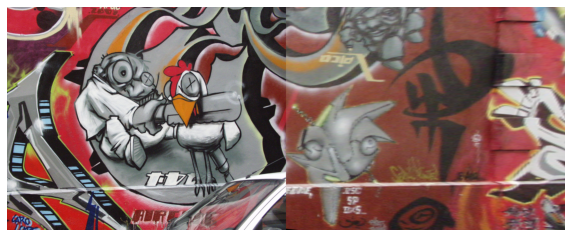

In [18]:
d = cv.warpPerspective(img3, np.linalg.inv(final), ((img3.shape[1] + img1.shape[1]), img1.shape[0]))
d[0:img1.shape[0], 0:img1.shape[1]] = img1
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(d)
ax.axis('off')
plt.show()